In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

As we can understand, the outliers can skew the data analysis power of a model resulting in dropping its accuracy. In this section, we will cover the python implementation of outlier detection and outlier treatment. Let’s consdier a dataset consisting of the details of accidents in the states of the USA. In the given dataset, different features related to the cause of the accidents and the cost to the accident insurance companies are given. The task is to detect and treat the outliers present in the given dataset. 

For this purpose, we can use various outlier detection techniques like boxplot, Z-score, IQR, etc. Using these techniques, we can detect the presence of outliers in the dataset. After outlier detection, we can use outlier treatment techniques to treat the detected outliers. There are various outlier treatment techniques like Trimming, Mean Imputation, Median Imputation, Winsorization, etc., which we can use to treat the outliers in a dataset.   

To implement outlier detection and outlier treatment in python in this problem, we take the following steps.

Step 1: Reading the dataset

In this very first step, we will read the dataset. To read this dataset, we need to use the seaborn library, so let’s import the library. 

In [2]:
# Importing required libraries
import seaborn as sns

After importing the seaborn library, let’s load the car crashes dataset available in the seaborn library. 

In [3]:
# Reading the dataset
df = sns.load_dataset("car_crashes")

After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.

In [4]:
# Checking top 5 rows of dataset
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


As we can see, the dataset has values of different features related to the cause of the accidents and the cost to the accident insurance companies. 

Let’s check the total number of records and features in the dataset.

In [5]:
# Checking the shape of the dataset
df.shape

(51, 8)

As we can see in the output, the dataset has 51 records and 8 features.

Step 2: Outlier Detection 

After reading and analysing the dataset, we can start performing various outlier detection techniques to detect the outliers present in the dataset. 

Step 2.1: Outlier Detection using Boxplot 

First, let’s use the boxplot to detect the outliers present in the dataset. We will consider the alcohol column from the dataset and check for outliers using a boxplot.

<AxesSubplot:ylabel='alcohol'>

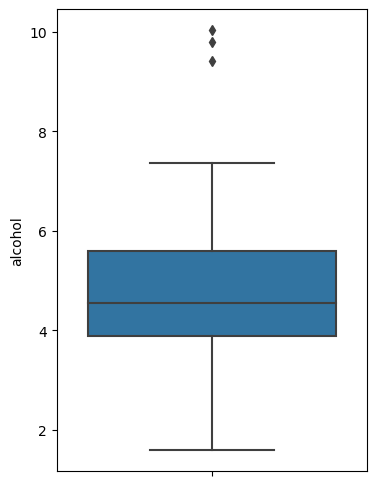

In [6]:
import matplotlib.pyplot as plt
#Outlier detection using Boxplot
plt.figure(figsize=(4,6))
sns.boxplot(y ="alcohol", data = df)

All the data values which are not present in the range of minimum and maximum of a boxplot are considered outliers. As we can see from the visualisation of the boxplot, the alcohol column is having three outliers. 

Step 2.2: Outlier Detection using Z-Score

Now, let’s see how to detect outliers with Z-scores. The criteria for detecting outliers using Z-scores is any data value whose Z-score falls out of the 3rd standard deviation is considered an outlier.  

 First, let’s calculate the mean and standard deviation of the required data. 

In [7]:
mean = df["alcohol"].mean()

#Calculating Standard Deviation
standard_deviation  = df["alcohol"].std()
#After calculating the mean and standard deviation of the alcohol column, we can now compute the Z-score using the formula (Xi - Mean) / Standard Deviation. 
#Optimal Threshold
optimal_threshold = 2

outliers = []

for i in df["alcohol"]:
 ZScore = (i - mean)/standard_deviation
 if np.abs(ZScore) > optimal_threshold:
   outliers.append(i)

As we can see, we are providing a threshold value of 2, i.e. if the Z-score is more than 2, then the particular data value is an outlier. 

Let’s check all the data values with a Z-score more than the provided threshold. 

In [8]:
#Printing the outliers 
print("Outliers:", outliers)

Outliers: [9.416, 10.038, 9.799]


As we can see, 9.416, 10.038 and 9.799 are the outliers present in the alcohol column of the given data. 

Step 2.3: Outlier Detection using Inter Quartile Range

As the next step, we will use inter quantile range(IQR) to detect the outliers. IQR is the range between the first quartiles(Q1) and third quartiles(Q3). The data values which fall below (Q1 - 1.5*IQR )or above (Q3 + 1.5*IQR) are outliers.  

First, let’s read the required data and sort the data in ascending order. 

In [9]:
#Defining the data
initial_data = df["alcohol"]
#Sorting the data in ascending order
sorted_data = sorted(initial_data)

After sorting the data, let’s calculate the first quartile(Q1) and third quartile(Q3). 

In [10]:
#Calculating Quantiles
Q1 = np.percentile(sorted_data, 25)
Q2 = np.percentile(sorted_data, 50)
Q3 = np.percentile(sorted_data, 75)

Using the first and third quartiles, let’s calculate the interquartile range. The IQR is the difference between the third quartile(Q3) and the first quartile(Q1).

In [11]:
#Calculating IQR
IQR = Q3 - Q1

After calculating the IQR, let’s now set the upper and lower bounds using the calculated IQR

In [12]:
#Lower Limit and Upper Limit
lower_limit = Q1 - ((3/2)*IQR)
upper_limit = Q3 + ((3/2)*IQR)

Using the calculated lower and upper limits, we can detect all the outliers present in the data. All the data points falling below the lower bound and above the upper bound are considered as outliers. 

In [13]:
#Detecting outlier
outliers = []
for i in sorted_data:
 if ((i > upper_limit) or (i < lower_limit)):
   outliers.append(i)

Now let’s check all the data values falling above the upper bound and below the lower bound. 

In [14]:
#Printing the outliers 
print("Outliers:", outliers) 

Outliers: [9.416, 9.799, 10.038]


As we can see, 9.416, 10.038 and 9.799 are the outliers present in the alcohol column of the given data since these data points are not falling between the upper and lower bound

Step 3: Outlier Treatment 

So using the outlier detection techniques, we understood that the alcohol column of the car crashes dataset contains three outliers. These outliers can potentially affect the accuracy of the model. So treatment of these outliers is required. There are several outlier treatment techniques by which we can treat the outliers. So in this course, we will use two types of outlier treatment methods to treat the outliers in the dataset. 

Step 3.1: Trimming 

First, let’s see how to treat the outliers using the trimming method. So in this python implementation, we perform outlier treatment using IQR. In trimming, we will removing all the data points which are falling below the lower bound and above the upper bound. 

First, let’s import the car crashes dataset from seaborn libarary. 

In [15]:
#importing the dataset
df = sns.load_dataset("car_crashes")

From the given dataset, we are considering the alcohol column to perform outiler treatment.

Let’s check the total number of records in the alcohol column.

In [16]:
#Visualization the shape
print("Shape with outliers:",df["alcohol"].shape)

Shape with outliers: (51,)


After that, let’s calculate the first quantile(Q1) and third quantile(Q3) of the alcohol column.

In [17]:
#Calculating Quantiles
Q1 = np.percentile(df["alcohol"], 25)
Q2 = np.percentile(df["alcohol"], 50)
Q3 = np.percentile(df["alcohol"], 75)

Using the calculated first and third quartiles, let’s calculate the interquartile range. The IQR is the difference between the third quartile(Q3) and the first quartile(Q1).

In [18]:
#Calculating IQR
IQR = Q3 - Q1

Using the  calculated the IQR, let’s now compute the upper and lower bounds. All the data points falling below the lower bound and above the upper bound are considered as outliers

In [19]:
#Lower Limit and Upper Limit
lower_limit = Q1 - ((3/2)*IQR)
upper_limit = Q3 + ((3/2)*IQR)

#Creating upper and lower bound
upperbound = np.where(df["alcohol"] >= upper_limit)
lowerbound = np.where(df["alcohol"] <= lower_limit)

So we will drop all the data points falling above the upper bound and below the lower bound from the data.   

In [20]:
#Removing outlier
df.drop(upperbound[0], inplace = True)
df.drop(lowerbound[0], inplace = True)

After dropping the data points above upper bound and below lower bound, we will now visualize the shape of the data. 

In [21]:
#Printing the final shape
print("Shape after removing outliers:", df["alcohol"].shape)

Shape after removing outliers: (48,)


Initially, by using outlier detection techniques we found that the alcohol column of the car crashes dataset was containing three outliers. So we removed all the outliers in the alcohol column by trimming them from the data. As we can clearly see, the number of records have been reduced from the (51, ) to (48, ), which indicates that the outliers present in the data has been dropped.

Now, let’s use the boxplot to check the outliers present in the alcohol column of the dataset.

All the data values which are not present in the range of minimum and maximum of a boxplot are considered outliers.

<AxesSubplot:>

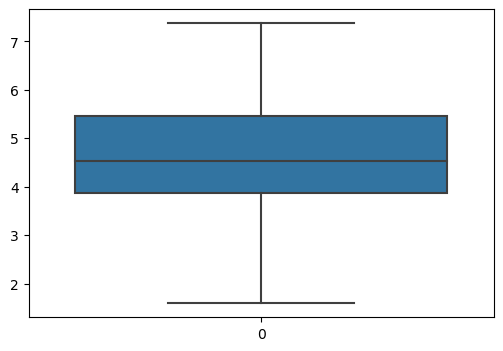

In [22]:
#Visualizating Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(df["alcohol"])

As we can see from the visualisation of the boxplot, the alcohol column does not contain any outliers after treating them using trimming technique. Similarly we can use the same method to treat the outliers present in other columns of the dataset.  We can also use other outlier treatment techniques (i.e. Imputation, Winsorization, etc. to treat the outliers present in the data. 

So, this is how we can use the outlier detection and treatment techniques to find and treat the outliers present in the data.